In [1]:
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Plus, c___]] := 
 Distribute[h[a, b, c], Plus, h, Plus, ExpandNCM[h[##]] &]
ExpandNCM[(h : NonCommutativeMultiply)[a___, b_Times, c___]] := 
 Most[b] ExpandNCM[
   h[a, Last[b], c]] (* last must be a noncommutative variable *)

ExpandNCM[a_] := ExpandAll[a]
ExpandNCM[Plus[a_, b__]] := ExpandNCM[a] + ExpandNCM[Plus[b]];
ExpandNCM[Times[a_, b__]] := Expand[ExpandNCM[a] ExpandNCM[Times[b]]];

Unprotect[NonCommutativeMultiply];
ClearAll[NonCommutativeMultiply]; 
SetAttributes[NonCommutativeMultiply, OneIdentity];
NonCommutativeMultiply[a_] := a;
NonCommutativeMultiply[a___, x_?NumericQ, b___] := x a ** b;
SetAttributes[NonCommutativeMultiply, Flat];
NonCommutativeMultiply[a___, x^c_., x^d_., b___] := 
  a ** x^(c + d) ** b;
NonCommutativeMultiply[a___, y^c_., y^d_., b___] := 
  a ** y^(c + d) ** b;
  
XYtoZ[Times[a_, b__]] := Expand[XYtoZ[a] XYtoZ[Times[b]]];
XYtoZ[Plus[a_, b__]] := XYtoZ[a] + XYtoZ[Plus[b]];
XYtoZ[NonCommutativeMultiply[x^a_., y^b_., c___]] := 
  Subscript[z, a + 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[NonCommutativeMultiply[y^b_., c___]] := 
  Subscript[z, 1] ** XYtoZ[y^(b - 1) ** c];
XYtoZ[y^b_.] := Subscript[z, 1] ** XYtoZ[y^(b - 1)];
XYtoZ[a_] := a;
ZtoXY[a_] := a /. Subscript[z, p_] -> x^(p - 1) ** y;

Harmonic[NonCommutativeMultiply[Subscript[z, p_], a__] | Subscript[z, 
    p_], NonCommutativeMultiply[Subscript[z, q_], b__] | Subscript[z, 
    q_]] := Subscript[z, p] ** (Harmonic[a, Subscript[z, q] ** b]) + 
   Subscript[z, q] ** (Harmonic[Subscript[z, p] ** a, b]) + 
   Subscript[z, p + q] ** (Harmonic[a, b]);
Harmonic[a_] := a;
Harmonic[] = 1;

Shuffle[NonCommutativeMultiply[x_Symbol^a_., c___] | x_Symbol^a_., 
   NonCommutativeMultiply[y_Symbol^b_., d___] | y_Symbol^b_.] := 
  x ** (Shuffle[x^(a - 1) ** c, y^b ** d]) + 
   y ** (Shuffle[x^a ** c, y^(b - 1) ** d]);
Shuffle[a_] := a;
Shuffle[a_?NumericQ, b_] := a b;
Shuffle[a_, b_?NumericQ] := a b;
Shuffle[] = 1;

Regsha[Times[a_, b__]] := Expand[Regsha[a] Regsha[Times[b]]];
Regsha[Plus[a_, b__]] := Regsha[a] + Regsha[Plus[b]];
Regsha[NonCommutativeMultiply[y^b_., x^a_., c___]] := (-1)^b x ** 
    Shuffle[y^b, x^(a - 1) ** c];
Regsha[a_] := a;

-z      ** z      - z        ** z  - z  ** z      ** z  - z      ** z  ** z  - 
  a + b     a + b    2 a + b     b    a     a + b     b    a + b     a     b
 
>   z      ** z  ** z
     a + b     b     a
-z  ** z        - z      ** z      - z  ** z  ** z      - z  ** z  ** z      - 
  b     2 a + b    a + b     a + b    a     b     a + b    b     a     a + b
 
>   z  ** z      ** z
     b     a + b     a
z  ** z        + z        ** z  + z
 b     2 a + b    2 a + b     b    2 a + 2 b
z  ** z        + z        ** z  + z
 b     2 a + b    2 a + b     b    2 a + 2 b
2 z      ** z      + z
   a + b     a + b    2 a + 2 b
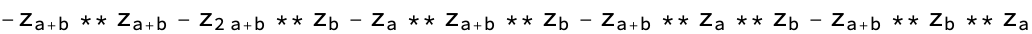
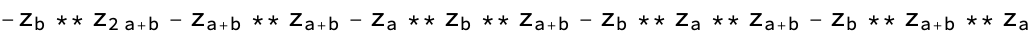
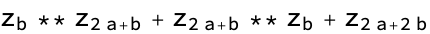
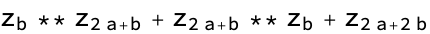
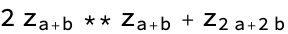

In [108]:
Fooo[a_,b_]:=
Harmonic[Subscript[z, b]**Subscript[z, b],Subscript[z, a]**Subscript[z, a]]//ExpandNCM
-Harmonic[Subscript[z, a+b]**Subscript[z, b],Subscript[z, a]]//ExpandNCM
-Harmonic[Subscript[z, b]**Subscript[z, a+b],Subscript[z, a]]//ExpandNCM
+Harmonic[Subscript[z, 2*a+b],Subscript[z, b]]//ExpandNCM
+Harmonic[Subscript[z, b],Subscript[z, 2*a+b]]//ExpandNCM
+Harmonic[Subscript[z, a+b],Subscript[z, a+b]]//ExpandNCM

z  ** z  + z  ** z  ** z  + z  ** z  ** z  + z  ** z  ** z  + z  ** z  ** z  + 
 5     5    2     3     5    2     5     3    3     2     5    3     5     2
 
>   z  ** z  ** z  + z  ** z  ** z  + z  ** z  ** z  ** z  + z  ** z  ** z  ** z  + 
     5     2     3    5     3     2    2     2     3     3    2     3     2     3
 
>   z  ** z  ** z  ** z  + z  ** z  ** z  ** z  + z  ** z  ** z  ** z  + 
     2     3     3     2    3     2     2     3    3     2     3     2
 
>   z  ** z  ** z  ** z
     3     3     2     2
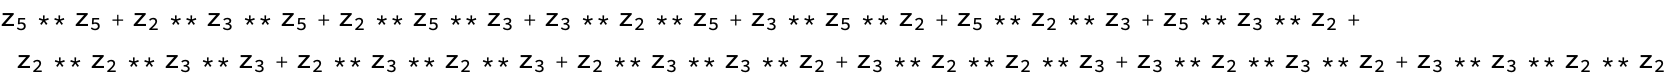

In [114]:
Fooo[3,2]

z  ** Harmonic[z  ** z , z , z ] + z      ** Harmonic[z , z , z ] + 
 a              b     b   a   a     a + b              b   a   a
 
>   z  ** z  ** Harmonic[z , z , z ] + z  ** z      ** z    + 
     b     a              b   a   a     b     a + b     2 a
 
>   2 z  ** z      ** z  ** z  + z  ** z  ** z  ** z  ** z
       b     a + b     a     a    b     b     a     a     a
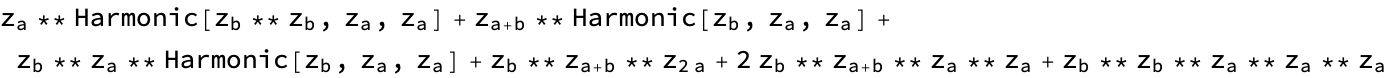

In [101]:
Harmonic[Subscript[z, b]**Subscript[z, b],Subscript[z, a]**Subscript[z, a]**Subscript[z,a]]//ExpandNCM

a ** b + b ** a + b ** c + c ** b
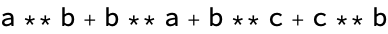

In [96]:
XYtoZ[ExpandNCM[Shuffle[a,b]+Shuffle[c,b]]]